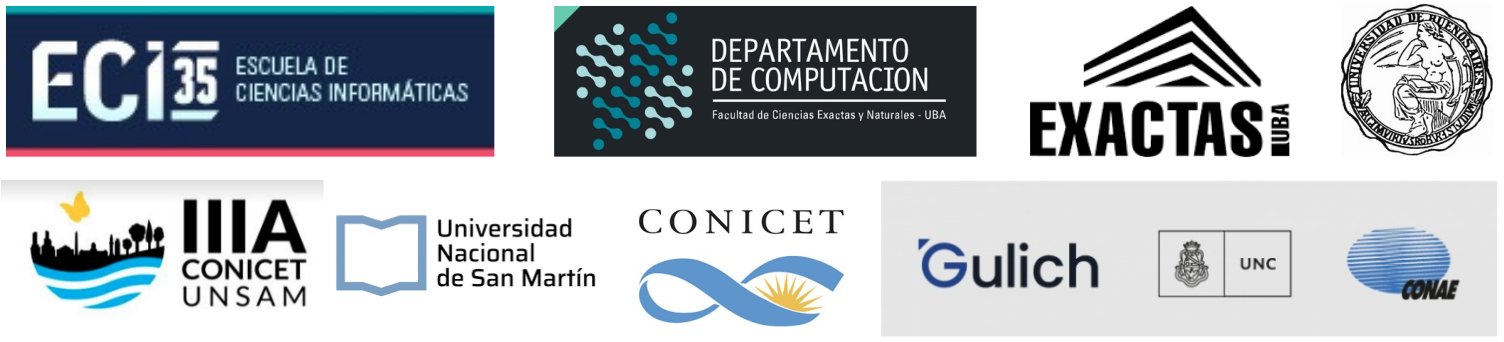
# Escuela de Ciencias Informáticas - 2022 - DC - FCEN - UBA
## Curso: Procesamiento de Imágenes Satelitales.  Docente: Rafael Grimson


---
# Notebook 0: Prerrequisitos de python para el curso
---


Lo que repasamos en cada parte:

## Índice:

- ### Parte a: Estructuras básicas, bibliotecas `numpy` y `pandas`
  1. [x] Estructuras básicas: listas, tuplas y diccionarios
  1. [x] Biblioteca `numpy`: Manejo básico de arrays, acceso a los datos, operaciones básicas y máscaras
  1. [x] Biblioteca `pandas`: Estructuras Series y DataFrame, acceso a los datos y filtros

- ### Parte b: Lectura de archivos, funciones, fechas
  1. [x] Leer archivos txt y csv
  1. [x] Listar archivos desde un directorio
  1. [x] Construir funciones básicas
  1. [x] Manejo básico de fechas, formato `datetime`

- ### Parte c. Biblioteca `matplotlib`
  1. [x] Biblioteca `matplotlib`: plots básicos para la visualización de información

---

# a.1 Estructuras Básicas

## 1.1 ¿Qué es una lista?
Una lista es una estructura de datos que permite almacenar diferentes tipos de elementos (enteros, flotantes, cadenas de texto, listas, etc.) en un mismo objeto. El acceso a cada uno de sus elementos se puede realizar por medio de su ubicación dentro de la lista, comenzando a contar a partir de cero. 

In [ ]:
lista = [1, 'perro', [2, 3], 1.5, None, 1]

print(lista)

print('el tercer elemento de la lista es', lista[2]) # empieza desde 0

Para acceder a una porción de la lista (_slice_) utilizamos los dos puntos :

In [ ]:
print(lista[:2]) # desde el principio hasta -antes de- la posición 2

print(lista[2:5]) # desde la posición 2 hasta -antes de- la posición 5

Gráficamente:

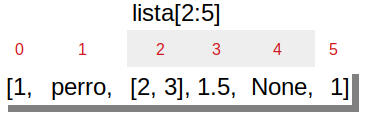

También podemos acceder a ubicaciones contando de atrás para adelante desde el -1

In [ ]:
print(lista[-1])

print(lista[-3:-1])

También es posible conocer información sobre la lista y sus elementos con métodos como _type()_ o _len()_:

In [ ]:
lista = [1, 'perro', [2, 3], 1.5, None, 1]

print('tipo de elemento de la posición 2 de la lista: ',  type(lista[2]))

print('longitud de la lista: ',  len(lista))

print('tipo y longitud del segundo elemento de la lista: ', type(lista[1]),"," , len(lista[1]))


Las listas son de tipo mutable, esto quiere decir que sus características pueden ser modificadas, lo que permite a las mismas crecer de manera dinámica, ejemplo:

In [ ]:
lista = [1, 'perro', [2, 3], 1.5, None, 1]

lista.append('nuevo elemento') # agrego un nuevo elemento

print(lista)

lista.remove(1.5) # elimino un elemento que pertenece a la lista

print(lista)

del lista[4] # elimino el elemento de la posición 4

print(lista)

lista[2] = [1,5,6] # reemplazo el elemento de la posición 2

print(lista)

lista.insert(1, 'gato') # inserto un elemento en la posición 1

print(lista)

Esta propiedad de mutabilidad hace que al realizar modificaciones sobre una lista, las mismas se realicen en todos los elementos que hagan uso de ella.

In [ ]:
lista = [1, 'perro', [2, 3], 1.5, None, 1]

lista2 = ['a', 'b', 'c', lista]

print('La lista 2 contiene la lista original:')

print(lista2)

Al modificar el segunto elemento de la lista original, también se modifica la lista2:

In [ ]:
lista[1] = 'Gato'

print('lista original modificada:\n', lista)

print('\nlista 2:\n', lista2)


Y si modificamos un elemento de lista que se encuentra contenida en la lista2?

### Ejercicio 0.1:

Modificar la lista que se encuentra contenida en la lista2, cambiar el elemento con el nombre 'Gato' a 'Perro' y verificar qué pasa con ambas listas. Para acceder a esta posición deberá utilizar dos índices, el índice de la lista seguido por el índice del elemento en la segunda lista. Para entender mejor esto, imprimir en pantalla:

lista2[3]

lista2[3][2]

lista2[3][2][1]


¿Cómo hago para que esto no pase?

Para evitar este tipo de inconvenientes podemos utilizar el método copy():

In [ ]:
lista = [1, 'perro', [2, 3], 1.5, None, 1]

lista2 = ['a', 'b', 'c', lista.copy()]

print('La lista 2 contiene una copia de la lista original:')

print(lista2)

Cambiamos nuevamente el segundo elemento de nuestra lista original:

In [ ]:
lista[1] = 'Gato'

print('lista original modificada:\n', lista)

print('\nlista 2:\n', lista2)

También podemos iterar sobre una lista. Por ejemplo, si queremos armar una nueva lista con los elementos de la lista que no sean iguales a _1_ podemos: 

In [ ]:
nounos_lista = []
for elem in lista:
    if elem != 1:
        nounos_lista.append(elem)

print('nueva lista: ', nounos_lista)

O por comprensión de listas:

In [ ]:
nounos_lista = [elem for elem in lista if elem != 1]

print('nueva lista: ', nounos_lista)

Para conocer más sobre listas y sus métodos consultar el siguiente [enlace](https://entrenamiento-python-basico.readthedocs.io/es/latest/leccion3/tipo_listas.html#:~:text=Una%20lista%20en%20Python%20es,el%20%C3%ADndice%20del%20primer%20elemento.&text=La%20funci%C3%B3n%20len()%20devuelve,(su%20cantidad%20de%20elementos).)

---

## 1.2. ¿Qué es una tupla?
Las tuplas son una estructura similar a las listas, permiten almacenar diferentes tipos de elementos (enteros, flotantes, cadenas de texto, listas, etc.) en un mismo objeto y el acceso a cada uno de sus elementos se realiza, al igual que las listas, por su ubicación en la misma. Sin embargo, a diferencia de las listas, las tuplas son estructuras que no son mutables, es decir, sus valores son fijos. Ejemplo:

In [ ]:
a = (1, 'Gato', 3)
print('El elemento almacenado en a es de tipo: ', type(a))

In [ ]:
print('El segundo elemento de a es: ', a[1])

In [ ]:
#Intentando modificar una tupla:
#descomentá esta la siguiente linea para obtener un error
#a[0] = 5

Las tuplas, al igual que las listas son iterables y es posible pasar de una a otra con los comandos list() y tuple()

---

## 1.3. ¿Qué es un diccionario?
Los diccionarios son estructuras de datos que, al igual que las listas y las tuplas, permiten almacenar diferentes tipos de datos, sin embargo, a diferencia de estas los elementos no son indexados, sino que se almacenan de la forma llave y valor, donde la llave corresponde a un identificador único que permite acceder al elemento. Un diccionario se define entre llaves {}, cada uno de sus elementos se encuentra separado por comas (,) y cada par {llave: valor} se separa por dos puntos (:)

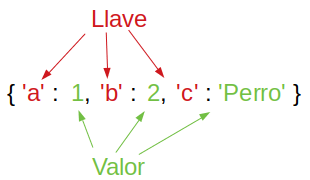

Veamos esto con ejemplos:

In [ ]:
dic = {'a': 1, 'b': 2, 'c': 'Perro'}
print(dic)

Podemos conocer tanto las llaves como los valores de un diccionario haciendo uso de sus métodos keys() y values():

In [ ]:
print('Las llaves de nuestro diccionario son: ')
print(dic.keys())
print('\nLos valores de nuestro diccionario son: ')
print(dic.values())

Así como recuperar todos los elementos como una lista de tuplas, donde cada tupla corresponde a un par (llave, valor):

In [ ]:
print(dic.items())

Ahora bien, los diccionarios pueden ser creados de diferentes maneras, a continuación les presentaremos algunas alternativas tomando datos extraídos de la página de [Datos Agroindustriales](https://datos.agroindustria.gob.ar/dataset/estimaciones-agricolas) del Ministerio de Agricultura Ganadería y Pesca de Argentina:

In [ ]:
# Forma simple: defino el diccionario entre dos llaves {} poniendo cada clave con su valor separados de dos puntos
dic1 = {
    'id_provincia': 14, 
    'provincia': 'Cordoba',
    'id_departamento': 63,
    'departamento': 'Marcos Juarez',
    'id_cultivo': 34,
    'cultivo': 'Soja 1ra',
    'id_campaña': 50,
    'campaña': '2018/2019',
    'sup_sembrada': 333319,
    'sup_cosechada': 319179,
    'produccion': 1390982,
    'rendimiento': 4358
}

print(dic1)
print(type(dic1))

In [ ]:
#A partir de argumentos con nombre

dic2 = dict(
    id_provincia=14,
    provincia='Cordoba',
    id_departamento=63,
    departamento='Marcos Juarez',
    id_cultivo=34,
    cultivo='Soja 1ra',
    id_campaña=50,
    campaña='2018/2019',
    sup_sembrada=333319,
    sup_cosechada=319179,
    produccion=1390982,
    rendimiento=4358
)
print(dic2)

In [ ]:
#A partir de dos listas, una con las llaves y otra con los valores

llaves = [
    'id_provincia', 
    'provincia', 
    'id_departamento', 
    'departamento', 
    'id_cultivo', 
    'cultivo', 
    'id_campaña', 
    'campaña', 
    'sup_sembrada', 
    'sup_cosechada', 
    'produccion', 
    'rendimiento'
]

valores = [
    14, 
    'Cordoba',
    63,
    'Marcos Juarez',
    34,
    'Soja 1ra',
    50,
    '2018/2019',
    333319,
    319179,
    1390982,
    4358
]

In [ ]:
# empiezo con un diccionario vacío
dic3 = {}

for i in range(len(llaves)): 
    dic3[llaves[i]] = valores[i] # voy agregando de a una las llaves con sus respectivos valores
    
print(dic3)

In [ ]:
# por comprensión de diccionarios

dic3 = {llaves[i]:valores[i] for i in range(len(llaves))}
print(dic3)

In [ ]:
# usando la función zip

dic3 = dict(zip(llaves, valores))
print(dic3)

Por otro lado, como mencionamos anteriormente, los valores en el diccionario no son indexados numéricamente, es decir, no podemos acceder a la posición 0 con números, si lo podemos hacer por medio de su llave, por ejemplo:

In [ ]:
print(dic3['id_provincia'])

print(dic3.get('id_provincia'))

### Pregunta: 

Prueba las dos líneas ejecutadas anteriormente alterando la llave por una no existente en el diccionario y responde: 

¿Qué diferencia notaste entre ambas?

### Ejercicio 0.2: 

Dado el diccionario:

```
dic = {
    'id_provincia': 14, 
    'provincia': 'Cordoba',
    'id_departamento': 63,
    'departamento': 'Marcos Juarez',
    'id_cultivo': 34,
    'cultivo': 'Soja 1ra',
    'id_campaña': 50,
    'campaña': '2018/2019',
    'sup_sembrada': 333319,
    'sup_cosechada': 319179,
    'produccion': 1390982,
    'rendimiento': 4358
}
```
así como la lista:

```
lista = ['provincia', 'cultivo', 'campaña', 'produccion']
```

A partir de la variable _dic_, crear un nuevo diccionario que contenga únicamente las llaves de la lista.

<!-- <span style="color:blue">Recomendación</span>: Recuerda la forma simple de crear un diccionario y la comprensión de listas. -->

In [ ]:
dic = {
    'id_provincia': 14, 
    'provincia': 'Cordoba',
    'id_departamento': 63,
    'departamento': 'Marcos Juarez',
    'id_cultivo': 34,
    'cultivo': 'Soja 1ra',
    'id_campaña': 50,
    'campaña': '2018/2019',
    'sup_sembrada': 333319,
    'sup_cosechada': 319179,
    'produccion': 1390982,
    'rendimiento': 4358
}

lista = ['provincia', 'cultivo', 'campaña', 'produccion']

dic2 = {i:dic[i] for i in dic.keys() if i in lista}

print(dic2)


Al diccionario actual le podemos agregar una entrada:

In [ ]:
dic2['sup_total'] = 753000
print(dic2)

---

# a.2 Biblioteca Numpy
Numpy es una biblioteca que se especializa en el manejo objetos de tipo array de n dimensiones. Es utilizada como base en la mayoría de paquetes científicos de Python como por ejemplo Pandas, Scikit-learn, además de paquetes de visualización como Matplotlib.

## 2.1. ¿Cómo se importa numpy?
Para importar una biblioteca en python, normalmente se hace uso de la palabra _import_, donde es muy común que se utilice un _alias_ para modificar su nombre, esto se hace por medio de la palabra _as_. Por ejemplo, al importar la biblioteca numpy, en la mayoría de la documentación que encontremos vamos a ver que se se utiliza el _alias_ _"np"_, de esta manera, siempre utilizaremos este _alias_ para invocar las diferentes funciones de esta biblioteca:  


In [ ]:
import numpy as np

print(f'la versión de numpy utilizada es: {np.__version__}')

---

## 2.2 ¿Qué es un Array?
Un array es un arreglo (matriz) de n dimensiones (n >= 1), donde cada elemento contiene valores del mismo tipo (float, int, etc.), por ejemplo:


In [ ]:
arr = np.array([1, 2, 3, 4]) # array de una dimensión
print(arr)

Existen diversas formas de crear un array, por ahora vamos a nombrar solo algunas, sin embargo podemos consultar más información en este [enlace](https://numpy.org/doc/stable/user/basics.creation.html#arrays-creation):

In [ ]:
#A partir de una lista:
lista = [4, 6, 5, 7]
arr = np.array(lista)

print('Array creado a partir de una lista:', arr)
print('\nTipo de objeto:', type(arr))
print('\nTipo de dato:', arr.dtype)

In [ ]:
#A partir de una tupla:
tupla = (3, 6, 8, 8)
arr = np.array(tupla, dtype=float)

print('\nArray creado a partir de una lista:', arr)
print('\nTipo de objeto:', type(arr))
print('\nTipo de dato:', arr.dtype)

A partir de funciones generales de Numpy

In [ ]:
#Array de ceros de dos dimensiones
ceros = np.zeros((3,4)) # tiene forma 3x4 (3 filas y 4 columnas)
print('\nArray de ceros:\n', ceros)

#Array de unos de dos dimensiones
unos = np.ones((2,3))
print('\nArray de unos:\n', unos)

#Array random de dos dimensiones
random1 = np.random.random((2,4))
print('\nArray random 1:\n', random1)

random2 = np.random.randint(0, 5, size = (3,4))
print('\nArray random 2:\n', random2)


Al igual que las listas, estos array son mutables.


In [ ]:
arr1 = np.array([1, 2, 3, 4])
print('Array original', arr1)
arr1[2] = 50

print('Array luego de ser modificado', arr1)


Veamos qué pasa si tenemos diferentes tipos de datos en un array:

In [ ]:
arr3 = np.array([1, 'a', 3.])

print(arr3)
print(f'El array 3 es de tipo {arr3.dtype}')

Para más información acerca de los formatos de datos que maneja numpy consultar el siguiente [enlace](https://numpy.org/doc/stable/reference/arrays.dtypes.html#).

---

## 2.3. Acceso a los datos de un array

Los array de numpy son arreglos n-dimensionales, donde cada posición es indexada comenzando a contar a partir del cero. Veamos esto gráficamente:

In [ ]:
#Creamos el siguiente array:
arr = np.array([[4,3,1,0],[8,2,9,4],[5,7,6,5],[9,3,5,2],[4,6,7,1]]) # lo creamos con una lista de listas

print('arr:\n')
print(arr)
print('\nTipo de dato:', arr.dtype)
#Consultemos sus dimensiones:
print('\nDimensiones:', arr.shape) # dos dimensiones, forma 5x4

Como vemos, el array anterior tiene dos dimensiones (5, 4), donde la primera dimensión nos muestra el número de filas y la segunda el número de columnas. Sin embargo, las mismas se encuentran indexadas con números a partir del cero como muestra el gráfico a continuación:

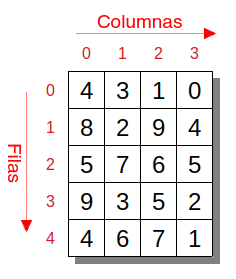


Supongamos que queremos acceder al dato de la segunda fila y tercera columna. En este caso deberíamos buscarlo en las posiciones (1, 2) del array. Vamos a verificarlo:

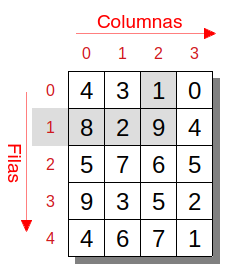

In [ ]:
print(arr[1, 2])

Esto es lo mismo que acceder de esta manera:

In [ ]:
print(arr[(1,2)]) # estamos accediendo a una posición representada por una tupla (1,2)

También es posible modificar las formas y dimensiones de nuestras matrices. Esto es especialmente útil cuando aplicamos algunas funciones estadísticas, como el cálculo de histogramas o regresiones lineales que veremos más adelante. Ejemplo:

In [ ]:
arr = np.random.random((3,4))
print('\nArray:\n',  arr)
print('\nDimensiones de nuestro array:\n',  arr.shape)

#Ravel
arr = arr.ravel()
print('\nArray modificado con la función ravel():\n',  arr)
print('\nDimensiones de nuestro array:\n',  arr.shape)

#Reshape
arr = arr.reshape(3,4)
print('\nArray modificado con la función reshape():\n',  arr)
print('\nDimensiones de nuestro array:\n',  arr.shape)

# otro reshape
arr = arr.reshape(4,3)
print('\nArray modificado con la función reshape():\n',  arr)
print('\nDimensiones de nuestro array:\n',  arr.shape)

# otro reshape
arr = arr.reshape(2,6)
print('\nArray modificado con la función reshape():\n',  arr)
print('\nDimensiones de nuestro array:\n',  arr.shape)

Otra herramienta útil que podemos utilizar es el _slicing_, que nos permite extraer porciones de nuestro array para ser procesadas independientemente, para esto, debemos tener en cuenta que el último elemento indexado no será incluído. Veamos esto gráficamente:

In [ ]:
arr = np.array([4, 5, 8, 6, 1, 2, 6, 9])
print(arr)

En el caso anterior, tenemos un array de 1 dimensión y 8 elementos. Supongamos que queremos extraer las posiciones 3, 4 y 5. Esto corresponde a los índices 2, 3 y 4 pero, dado que el último no se encuentra incluído, es necesario indicar también el índice 5. Para esto, entre corchetes definimos los índices inicial y final separados por dos puntos como se ve en la siguiente imagen:

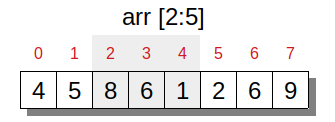


In [ ]:
subset_arr = arr[2:5]
print(subset_arr)

También es posible realizar una extracción cada x elementos, donde x representará el paso. Esto se realiza definiendo tres posiciones, inicio, fin y paso:

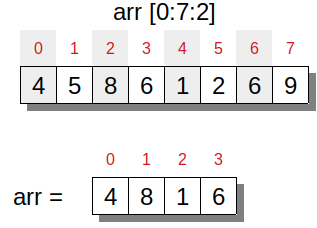

In [ ]:
subset_arr = arr[0:7:2]
print(subset_arr)

Vamos a extender esto a dos dimensiones:

In [ ]:
arr = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
      [0, 6, 8, 4, 3, 5, 5, 0],
      [0, 1, 7, 4, 2, 7, 9, 0],
      [0, 5, 6, 7, 9, 6, 8, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]])

print(arr)


Como vemos, el array anterior contiene un borde de ceros. Asumamos que necesitamos realizar algún tipo de operación donde ese borde nos genera conflicto. Podemos extraer únicamente la parte que nos interesa de la siguiente manera:

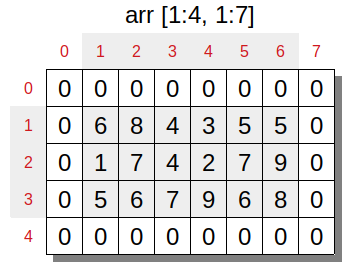


In [ ]:
subset_arr = arr[1:4, 1:7]
print(subset_arr)

---

## 2.4. Operaciones básicas con arrays

Los arreglos de numpy, a diferencia de las listas, permiten realizar operaciones directas entre ellos utilizando los operadores básicos de suma, resta, multiplicación, etc., aunque para esto, es necesario tener en cuenta que si la operación incluye dos arrays, estos deben tener las mismas dimensiones. Ejemplos:


In [ ]:
arr1 = np.arange(12).reshape(3,4)
arr2 = np.random.random((3,4))

print('\narr1:\n', arr1)
print('\narr2:\n', arr2)

print('\nDimensiones del arr1:', arr1.shape)
print('\nDimensiones del arr2:', arr2.shape)

In [ ]:
print('\narr1 + 5:\n', arr1 + 5) # sumo 5 a todos

print('\narr1 + arr2:\n', arr1 + arr2) # suma lugar a lugar

print('\narr1 * arr2:\n', arr1 * arr2) # producto lugar a lugar

Así mismo, numpy ofrece un gran número de funciones matemáticas que podemos aplicar a nuestros arrays. Estos se pueden consultar en el siguiente [enlace](https://numpy.org/doc/stable/reference/routines.math.html).

---

## 2.5. Máscaras

Las máscaras son elementos útiles cuando queremos trabajar con los elementos que cumplen determinado criterio que nos interesa, por ejemplo, valores de altura en un Modelo de Elevación Digital, Temperatura Superficial, etc. 

Veamos cómo podríamos hacer esto desde Numpy. Para esto utilizaremos el mismo array creado en el punto anterior, quedándonos únicamente con los valores mayores a 5:

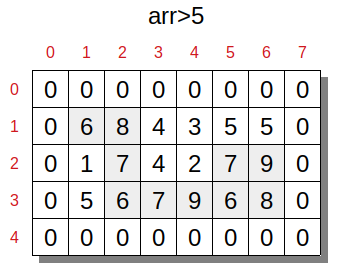


In [ ]:
mascara = arr>5
print(mascara)

Como vemos, al aplicar la condición arr>5, se genera un nuevo array que me devuelve valores True o False, dependiendo si se cumple o no la condición deseada. Ahora, para aplicarla a mi array es solo cuestión de multiplicar ambas matrices:

In [ ]:
array_mask = mascara*arr
print(array_mask)

En lugar de multiplicar, podríamos indicar estos valores como nulos utilizando el elemento _np.nan_ de numpy de esta manera, los ceros no afectarán si queremos calcular algún estadístico sobre el total de nuestro arreglo. Sin embargo, esto aplica únicamente para arreglos de tipo _float_, por lo que tendremos que cambiar primero el tipo de dato:

In [ ]:
#Cambiamos el tipo de dato:
arr2 = arr.astype(float)

print('\nValores del arreglo arr2:')
print(arr2)
print('\nTipo de dato:', arr2.dtype)

In [ ]:
#Enmascarando nuestro arreglo: 
arr2[~mascara] = np.nan # en las posiciones que NO cumplen con el criterio

print('\nValores del arreglo arr2:')
print(arr2)
print('\nTipo de dato:', arr2.dtype)
print('Promedio de los valores del arreglo arr2:', np.nanmean(arr2))

In [ ]:
#Comparemos con la multiplicación previa donde nuestros elementos enmascarados tomaron valores de cero: 
array_mask = mascara*arr
array_mask = array_mask.astype(float)

print('\nValores del arreglo array_mask:')
print(array_mask)
print('\nTipo de dato:', array_mask.dtype)
print('Promedio de los valores del arreglo array_mask:', np.nanmean(array_mask))

### Ejercicio 0.3: 

Realizar el promedio de la siguiente matriz enmascarando los valores cero:

```
arr = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
      [0, 6, 8, 4, 3, 5, 5, 0],
      [0, 1, 7, 4, 2, 7, 9, 0],
      [0, 5, 6, 7, 9, 6, 8, 0],
      [0, 0, 0, 0, 0, 0, 0, 0]])
```

---

# a.3. Biblioteca Pandas

[Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) es un paquete de python construido sobre la biblioteca Numpy que contiene estructuras diseñadas para trabajar con información etiquetada. Esto facilita su análisis, así como el manejo de series temporales. Al igual que con Numpy, la biblioteca se importa mediante el comando _import_. Asimismo, a medida que avancemos y consultemos la documentación existente, veremos que se utiliza el _alias_ _pd_, como se muestra a continuación:

In [ ]:
import pandas as pd

---

## 3.1. Estructuras que maneja Pandas
Pandas cuenta con dos estructuras principales que son:
### 3.1.1. Series:
Una serie es el equivalente a array en una sola dimensión, pero con la posibilidad de utilizar etiquetas para su indexación. Esta estructura se puede construir a partir de listas, arrays de Numpy en una sola dimensión, diccionarios o tuplas, ejemplos:

In [ ]:
import pandas as pd
import numpy as np

#Recordemos el array creado anteriormente
arr1 = np.array([1, 2, 3, 4])
print(type(arr1))

seriesNumpy = pd.Series(arr1)
print(f'\nPandas Series creado a partir de un array de numpy:')
print(seriesNumpy)

In [ ]:
lista3 = [1, 2, 3, 4, 5]
seriesLista = pd.Series(lista3)
print(f'\nPandas Series creado a partir de una lista:')
print(seriesLista)

In [ ]:
diccionario = {'a': 1, 'b': 2, 'c':3}
seriesDic = pd.Series(data=diccionario, index=diccionario.keys())
print(f'\nPandas Series creado a partir de un diccionario:')
print(seriesDic)

#### Selección de datos:

Para acceder a los datos de la serie se puede hacer uso de los métodos _loc()_ e _iloc()_. 

Donde _iloc()_ realiza una consulta dada la posición del elemento en el vector (comenzando a contar desde cero), mientras que _loc()_ lo hace teniendo en cuenta el valor de la etiqueta en el índice:

In [ ]:
print(f'\nImprimir por posición en el vector:', seriesDic.iloc[1])
print(f'\nImprimir por etiqueta en el índice:', seriesDic.loc['b'])

Para más información acerca de Pandas Series puedes consultar el siguiente [enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series)

### 3.1.2. DataFrame:
Son equivalentes a tablas o planillas de datos en dos dimensiones, que permiten almacenar elementos de diferentes tipos. Al igual que la estructura Series, permite indexar las diferentes filas del _dataframe_ y, adicionalmente, manejar títulos para cada columna. 

Esta estructura también es posible crearla a partir de objetos tales como: listas, arrays en dos dimensiones, diccionarios o tuplas. Una muestra de esto se presenta a continuación:

In [ ]:
lista = [[1, 2], [3, 4], [5, 6]] 
dfLista = pd.DataFrame(lista, columns = ['col1', 'col2'])
print('\nPandas DataFrame a partir de lista:')
print(dfLista)

In [ ]:
arr = np.array(lista)
print('\nValores del array:')
print(arr)
dfArray = pd.DataFrame(arr, columns = ['col1', 'col2'])
print('\nPandas DataFrame a partir de array:')
print(dfArray)

In [ ]:
dic = {'col1': [1, 2], 'col2': [3, 4], 'col3': [5, 6]}
print('\nDiccionario:')
print(dic)
dfDic = pd.DataFrame(dic)
print('\nPandas DataFrame a partir de diccionario:')
print(dfDic)

In [ ]:
tupla = ((1, 2), (3, 4), (5, 6))
print('\nTupla:')
print(tupla)
dfTupla = pd.DataFrame(tupla, columns = ['col1', 'col2'])
print('\nPandas DataFrame a partir de tupla:')
print(dfTupla)

La estructura _dataframe_ permite manipular los índices, al igual que los nombres de las columnas. A continuación veremos un ejemplo de esto:

In [ ]:
lista = [[1, 2], [3, 4], [5, 6]] 
dfLista = pd.DataFrame(lista)
print('\nDataFrame original:')
print(dfLista)

# Modificando los índices:
dfLista.index = ['A', 'B', 'C']

# Modificando los títulos de las columnas:
dfLista.columns = ['col1', 'col2']

print('\nDataFrame modificado:')
print(dfLista)

In [ ]:
# Modificando el índice de mi dataframe:
print('\nUtilizando una columna como índice:')
dfLista = dfLista.set_index('col1') # ahora la columna 1 va a cumplir el rol de índice
print(dfLista)

#### Selección de datos:
Los métodos _loc()_ e _iloc()_ son extensivos para la selección de filas dentro de un _dataframe_. En el caso de las columnas, es posible seleccionarlas por medio de su nombre o índice. Ejemplos:

In [ ]:
dic = {'col1': [1, 2, 3], 'col2': [3, 4, 5], 'col3': [5, 6, 7]}
dfLista = pd.DataFrame(dic)
dfLista.index = ['A', 'B', 'C']

print('Tenemos nuestro dataframe:\n', dfLista)

In [ ]:
print('\nUtilizando el método iloc() para ubicar las filas 1 y 2 de la columna 0:\n')

print(dfLista.iloc[1:3,0])

print('\nAhora con el método loc():\n')

print(dfLista.loc['B':'C','col1'])

También es posible modificar los valores, así como agregar filas o columnas a nuestro _dataframe_, incluso es posible unir mas de un _dataframe_. Esto lo veremos en clases posteriores. Por ahora vamos a utilizar una función de la biblioteca pandas que nos permitirá leer un archivo csv: 

In [ ]:
df = pd.read_csv('data/raw_data/personas.csv')
print(df)

### Ejercicio 0.4
Explora los siguientes comandos para obtener la información del _dataframe_ anterior:

df.columns, df.index, df.shape, df.head(), df.tail() y type(df).


---

## 3.2. Filtros

Podemos realizar diferentes tipos de filtros que nos permitan obtener únicamente los registros de interés. Esta tarea se puede llevar a cabo mediante el uso de condicionales simples como: igual a (==), diferente (!=), mayor que (>), menor que (<), entre otros. A continuación veremos algunos ejemplos:

In [ ]:
#Filtrando datos:
print('Seleccionemos la columna dpto y consultemos los valores de la misma:\n')
print(df['dpto'].unique())

In [ ]:
print('\nSeleccionemos todos los registros cuyo dpto sea igual a 14:\n')

dpto14 = df[df['dpto']==14] 
# df['dpto'] == 14 es una máscara o filtro
# al considerar df[filtro] obtenemos la porción de dataframe correspondiente al filtro
# es decir, las filas que satisfacen la condición

print(dpto14)

In [ ]:
print('\nSumemos el total de personas del dpto 14:\n')

print(dpto14['total'].sum())

In [ ]:
print('\nFiltremos los registros del departamento 14 cuya fracción sea igual a 1:\n')

print(df[(df['dpto']==14) & (df['frac']==1)]) # utilizamos & para superponer dos filtros

In [ ]:
print('\nFiltremos los registros del departamento 14 cuya fracción no sea igual a 1:\n')

print(df[(df['dpto']==14) & ~(df['frac']==1)])
# print(df[(df['dpto']==14) & (df['frac']!=1)])


También es posible adicionar o eliminar columnas de nuestro _dataframe_, veamos a continuación como es esto:

In [ ]:
#Modificando dataframe
## Eliminar columna
print('\nEliminemos la columna código de nuestro dataframe:\n')

df = df.drop(columns=['codigo'])

print(df)

Reconstruyamos nuestra columna, para esto vamos a ver un método utilizado por la biblioteca pandas llamado _.map_. Este método permite iterar sobre una columna y aplicar una función determinada a una serie de datos. Antes de realizar este proceso, sobre nuestro _dataframe_, ejecutemos un ejemplo básico de este funcionamiento sobre una lista: 

In [ ]:
# Tenemos nuestra lista:
lista = [4, 5, 10, 20, 1]
print(lista)

Una vez tenemos nuestra lista, vamos a convertirla de valores enteros a datos de tipo _string_ buscando que conserven dos dígitos. Es decir, que nuestro número 4 pasará a ser '04', el 10 será '10', etc.
Para esto, una manera simple es iterar con un _for_ sobre nuestra lista:

In [ ]:
nueva_lista = ['{:02d}'.format(i) for i in lista]
print(nueva_lista)

Esto mismo se puede hacer utilizando _map()_, que devuelve un iterable que efectúa operaciones únicamente cuando se quiere acceder al elemento, es decir:

In [ ]:
map('{:02d}'.format, lista)

En el caso anterior tenemos un objeto que es un iterador, donde el resultado no se guarda en memoria, sino que se genera a medida que se requiere. Por ejemplo si hacemos:

In [ ]:
list(map('{:02d}'.format, lista))

Lo anterior es sumamente útil cuando se manejan grandes volúmenes de datos, permitiendo ejecuciones mucho mas eficientes de nuestros programas. 

Veamos ahora cómo lo implementaríamos para generar nuevamente nuestra columna _codigo_:

In [ ]:
## crear columna
df['codigo_nuevo'] = df['prov'].map(str) + df['dpto'].map(str) + df['frac'].map(str) + df['rad'].map(str)

print(df)

¿Se parece al código inicial? 

No, ¿verdad?

En el código inicial, la provincia tiene asignados dos dígitos, el departamento 3, la fracción y radios 2 cada uno. Esto es posible manejarlo si definimos el formato de la columna cuando aplicamos el método _map()_ de la misma manera que lo vimos en el ejemplo que ejecutamos previamente, así que vamos a recalcularlo:

In [ ]:
df['codigo_nuevo'] = df['prov'].map('{:02}'.format) + \
                     df['dpto'].map('{:03}'.format) + \
                     df['frac'].map('{:02}'.format) + \
                     df['rad'].map('{:02}'.format)
print(df)

De la misma manera que tomamos valores de diferentes columnas para formar una nueva, es posible extraer parte de una cadena string de una columna haciendo uso del método _map()_. Supongamos que nuestro dataframe solo cuenta con las columnas 'varon', 'mujer' y 'codigo_nuevo'. Esto se ve de la siguiente manera:

In [ ]:
df2 = df.loc[:,['varon', 'mujer', 'codigo_nuevo']]
df2

Ahora necesitamos crear a partir de nuestro código las columnas faltantes ('prov', 'dpto', 'frac', 'radio'). Esto sería fácil si tenemos un solo string, por ejemplo:

In [ ]:
s = '140070101'
print('\nProvincia: ', s[:2])
print('\nDepartamento: ', s[2:5])
print('\nFracción: ', s[5:7])
print('\nRadio: ', s[7:])

Aquí nuevamente nos puede ser de utilidad el método _map()_ visto anteriormente. Sin embargo, vamos a introducir un nuevo tipo de funciones llamadas funciones lambda. Estas funciones son también llamadas funciones anónimas, esto es porque no tienen un nombre que permita llamarlas. En lugar de eso, se pueden definir al momento de utilizarlas, simplificando el código y evitando guardar elementos innecesarios en memoria. Veamos como es esto paso a paso:

In [ ]:
lista = [4, 2, 5]
list(map(lambda x: x**2, lista))

Veamos ahora qué pasa con elementos de tipo string. Supongamos que tenemos una lista de nombres que queremos ordenar alfabéticamente. Esto es fácil utilizando la el método _sort()_ de los objetos tipo lista:

In [ ]:
nombres = ['Pedro Sanchez', 'Marcela Arias', 'Marcos Cardona', 'Martha Bravo']

In [ ]:
nombres.sort()
print(nombres)

nombres.sort(reverse=True)
print(nombres)

Sin embargo, ¿qué pasaría si queremos ordenar nuestra lista dados los apellidos de las personas?
En este caso resultan de gran utilidad las funciones lambda. Veamos como funcionan:

In [ ]:
nombres.sort(key=lambda x: x.split(' ')[1])
print(nombres)

Volvamos al caso de nuestro _dataframe_ y a modo de ejemplo vamos a obtener únicamente la columna 'dpto' a partir de nuestro código:

In [ ]:
df2

In [ ]:
df2['dpto'] = df2['codigo_nuevo'].map(lambda x: x[2:5])
df2

In [ ]:
type(df2['codigo_nuevo'].map(lambda x: x[2:5]))

### Ejercicio 0.5: 

1. Carga el archivo "personas.csv" que se encuentra en la carpeta _data/raw_data/_. Realiza la suma de las columnas _varon_ y _mujer_, almacénalas en una nueva llamada _total2_ y compáralas con la columna _total_. Deberían ser iguales.


2. Dado el siguiente diccionario, crea una columna en el _dataframe_ llamada _nombredpto_ donde se asigne el nombre del departamento correspondiente (según la columna _dpto_). Para el desarrollo de este ejercicio, recuerda los métodos de filtrado loc() e iloc().

```
#Diccionario:
nombres = {154:'SOBREMONTE',
175:'TULUMBA',
112:'RIO SECO',
28:'CRUZ DEL EJE',
49:'ISCHILIN',
140:'SAN JUSTO',
168:'TOTORAL',
105:'RIO PRIMERO',
70:'MINAS',
91:'PUNILLA',
21:'COLON',
77:'POCHO',
14:'CAPITAL',
119:'RIO SEGUNDO',
147:'SANTA MARIA',
126:'SAN ALBERTO',
7:'CALAMUCHITA',
133:'SAN JAVIER',
161:'TERCERO ARRIBA',
182:'UNION',
42:'GENERAL SAN MARTIN',
63:'MARCOS JUAREZ',
98:'RIO CUARTO',
56:'JUAREZ CELMAN',
84:'PTE ROQUE SAENZ PEÑA',
35:'GENERAL ROCA'}
```


Para más información acerca de Pandas DataFrame consulta el siguiente [enlace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame)

---

# Parte b: Lectura de archivos, funciones, fechas.



In [ ]:
import numpy as np
import pandas as pd

---

# 1. Lectura de archivos

# 1.1. Archivos csv

Anteriormente vimos un ejemplo de como importar un _dataframe_ haciendo uso de la biblioteca Pandas, pero esta no es la única que nos permite leer archivos almacenados en nuestro disco. Supongamos que nos interesa leer una matriz cualquiera de datos en formato csv o txt, utilicemos como ejemplo la _dataframe_ que leimos anteriormente:


In [ ]:
ruta = 'data/raw_data/' #Establecemos la ruta a nuestro archivo
archivo = np.genfromtxt(ruta+'personas.csv', skip_header=1, delimiter=',', dtype=int)
print(archivo)

En este caso, obtendríamos únicamente una matriz de datos que podríamos operar con facilidad, es decir, no tendríamos etiquetas para saber cual columna estamos operando. Como vimos anteriormente, la biblioteca Pandas soluciona este inconveniente.

In [ ]:
ruta = 'data/raw_data/' #Establecemos la ruta a nuestro archivo
archivo = pd.read_csv(ruta+'personas.csv')
print(archivo)

Incluso podemos leer archivos desde internet, esto siempre que se encuentren estructurados de la forma adecuada:

In [ ]:
cols = ['link', 'varon', 'mujer', 'totalpobl', 'hogares']

# Entrar en https://gobiernoabierto.cordoba.gob.ar/data/datos-abiertos/categoria/geografia-y-mapas/radios-censales/236
# y Copiar la url del csv
#archivo = ''

#df = pd.read_csv(archivo, usecols=cols, compression='zip')
#print(df.keys())

In [ ]:
#head(df)

---

## 1.2. Archivos txt
En el caso anterior, seleccionamos una serie de columnas de interés a partir de un _csv_ disponible en la web. Ahora, ¿qué pasa si nuestro archivo no se encuentra estructurado de una forma adecuada para la biblioteca?

Esto es muy común en los archivos de texto plano. Veamos por ejemplo qué pasa con un archivo de metadatos de una imagen proveniente del satélite Landsat 8 disponible en nuestra carpeta de datos:

In [ ]:
#Probemos con numpy:
ruta = 'data/raw_data/'
#descomentá esta la siguiente linea para obtener un error
#archivo = np.genfromtxt(ruta+'LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt')
#print(archivo)

In [ ]:
#Probemos con pandas:
ruta = 'data/raw_data/'
archivo = pd.read_csv(ruta+'LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt', delimiter='=')
print(archivo)

Lo anterior, aunque en este caso de alguna manera podría servir, no es lo que se esperaría cuando desarrollamos scripts de automatización, de hecho, existen archivos de metadatos donde los nombres de variables se repiten en diferentes subgrupos, lo cual generaría inconvenientes al momento de leer nuestras variables. 

No siempre vamos a poder manejar la estructura de los archivos de entrada. Archivos como los metadatos de las imágenes satelitales, vienen con estructuras definidas por cada agencia espacial y depende de nosotros generar _scripts_ que nos permitan acceder adecuadamente a ellos haciendo uso de biblioteca básicas.

Python permite, mediante su función _open_, leer y guardar diferentes tipos de archivos. Veamos un ejemplo de como leer adecuadamente el archivo anterior:

In [ ]:
ruta = 'data/raw_data/'
archivo = 'LC08_L1TP_226084_20200313_20200314_01_RT_MTL.txt'

with open(ruta+archivo, 'r') as f:
    archi = f.readlines()

print(archi)

Como vemos, la instrucción anterior carga el archivo y extrae las líneas, almacenando cada una de ellas en una lista. Cada línea tiene una serie de espacios, que no son de nuestro interés, así como con parámetro '\n' que indica un salto de espacio. Estos elementos no son útiles y pueden generar errores al momento de utilizar los parámetros extraidos, así que vamos a eliminarlos:

In [ ]:
archi = [i.strip(' \n') for i in archi] # Eliminamos los espacios y los saltos de línea
print(archi)

Si revisamos cada uno de los elementos de la lista, a excepción del último, estos contienen el nombre de una variable seguido por su valor. Esto ya es conocido de cuando trabajamos con diccionarios. A su vez, si revisamos el txt original podemos ver que tenemos un grupo que engloba todos nuestros datos y en este, tenemos subgrupos donde cada subgrupo tiene un comienzo indicado por la palabra _GROUP_ y un final, indicado por la palabra _END_GROUP_:

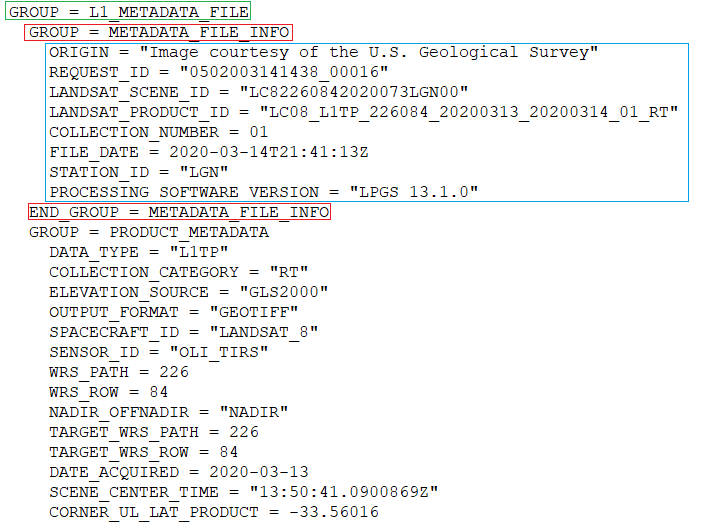


 Teniendo esta estructura vamos entonces a construir nuestro diccionario:

In [ ]:
group1 = archi[0].split(' = ')[1] #Nombre del grupo principal
diccionario = {group1:{}}
# print(diccionario)
for i in range(1, len(archi)):
    params = archi[i].split(' = ')
    if params[0]=='GROUP':
        
        #Creamos el subgrupo
        subgrupo = params[1]
        diccionario[group1][subgrupo] = {}
        #Almacenamos las variables del subgrupo
        while params[0]!='END_GROUP':
            i += 1
            params = archi[i].split(' = ')
            if params[0]!='END_GROUP': #Este no nos interesa
                diccionario[group1][subgrupo][params[0]] = params[1].replace('"','')

#         while archi[i+1].split(' = ')[0]!='END_GROUP':
#             i += 1
#             params = archi[i].split(' = ')
#             diccionario[group1][subgrupo][params[0]] = params[1].replace('"','')


print(diccionario)


Veamos qué grupos se crearon consultando mediante el método _keys()_ de nuestro diccionario:

In [ ]:
print(diccionario['L1_METADATA_FILE'].keys())

Podríamos extraer uno de los grupos que nos interese y convertirlo en una estructura Pandas Series:

In [ ]:
subgrupo = diccionario['L1_METADATA_FILE']['PROJECTION_PARAMETERS']

print('\nSubgrupo PROJECTION_PARAMETERS visto como diccionario:')
print(subgrupo)

prjParams = pd.Series(subgrupo)
print('\nSubgrupo PROJECTION_PARAMETERS visto como estructura Pandas Series:')
print(prjParams)

### Ejercicio 0.6:
Leer el archivo _/data/raw_data/ejemplo_xml_2.xml_ como un diccionario de datos que contenga 3 keys. Cada key va a ser el nombre del país y cada valor de esa key va a ser un dicionario con la llave:valor de los tags rank, year y gdppc, como se muestra a continuación:

```
{'Liechtenstein': {'rank': '1', 'year': '2008', 'gdppc': '141100'}, 'Singapore': {'rank': '4', 'year': '2011', 'gdppc': '59900'}, 'Panama': {'rank': '68', 'year': '2011', 'gdppc': '13600'}}
```

---

# 2. Funciones
Las funciones en un lenguaje de programación, son partes de código que encapsulan un conjunto de instrucciones, facilitando su uso y permitiendo su reutilización, tanto a lo largo del nuestro programa, como por programas externos. Las funciones se componen de las siguientes partes:

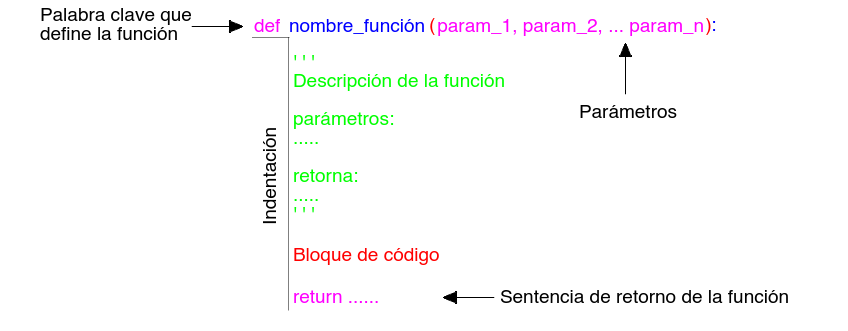


In [ ]:
def suma(a, b):
    '''
    Esta función devuelve la suma de dos números a y b    
    '''
    res = a + b
    return res

## Cómo llamamos una función?



In [ ]:
v1 = 5
v2 = -10
mi_suma = suma(v1, v2)
print(mi_suma)

Una función puede tener además parámetros predefinidos que pueden o no ser establecidos cuando se realiza una llamada a la misma, por ejemplo:

In [ ]:
def raiz(a, b = 2):
    '''
    Esta función devuelve la raiz b de un número entero a positivo. 
    En caso de no definirse un valor para b, tomará por defecto 2.
    
    a debe ser un número positivo
    b debe ser un número entero   
    '''
    res = a**(1/b)
    return res

En el caso anterior, dado que b tiene por defecto valor 2, si necesitamos calcular una raíz cuadrada, no sería necesario definirlo:

In [ ]:
print(raiz(16))
print(raiz(125,3))

Hasta ahora vimos como llamar funciones que creamos en el archivo que estamos trabajando, pero también es posible llamar funciones creadas en otros archivos. Las podemos importar a nuestro _script_ llamándolas como si fueran bibliotecas. Veamos esto siguiendo los pasos a continuación:

- Crear un archivo llamado _funciones.py_ en nuestra carpeta _Clase01_. 
- Copiar las siguientes líneas en el encabezado del mismo:

```
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#----------------------------------------------------------------------------
# Created By  : 
# Created Date: 
```
- Copiar la función _raiz_ creada anteriormente. Guardamos el archivo.
- Crear una celda en este documento, copiar lo siguiente y ejecutarla:

```
import funciones as fn
```

- Ejecutar el siguiente comando en una nueva celda en esta _notebook_:

```
help(fn.raiz)
```

- Calcular la raiz cuadrada de 256 como:

```
num = fn.raiz(256)
```

Una forma alternativa sería:

```
from funciones import raiz

num = raiz(256)
```


También es posible mover el archivo a una ruta diferente, pero en este caso deberíamos adicionar la ruta al listado de directorios de nuestro intérprete. Vamos a mover nuestro script _funciones.py_ al directorio raíz de las clases. Posteriormente, ejecutaremos las siguientes instrucciones:

- Crear una nueva celda y adicionar nuestra ruta al listado de directorios con la siguiente instrucción:

```
import sys
sys.path.append('../')
```

- Importar nuestra biblioteca y calcular la raíz cuadrada de 256:

```
from funciones import raiz
mi_numero = raiz(256)
print(mi_numero)
```
Este archivo lo deberán guardar y en el, escribir todas las funciones que se vayan creando a lo largo del curso, dado que las mismas serán utilizadas en clases posteriores.

### Ejercicio 0.7:

En el caso anterior, realizamos una función que dados dos valores devuelve su suma o una que calcula una raíz dada de un número. Estas funciones, como vimos podrían ser utilizadas a lo largo de un programa siempre que se quiera realizar la misma operación. Claramente, para una operación tan sencilla no resulta adecuado generar una función, pero en casos como la lectura de un archivo como los que vimos anteriormente, podría resultar de utilidad. Tomemos el código que lee los metadatos de nuestra imagen Landsat 8 y lo convertimos en una función llamada _read_l8_metadata()_ que devuelva los parámetros del grupo _MIN_MAX_REFLECTANCE_ como objeto _pandas.Series_.

### Ejercicio 0.8:

Modifique la función anterior para que dada una lista, la función devuelva los diccionarios de los subgrupos de esa lista.

---

# 3. Listar archivos

Es muy común que al procesar diferentes conjuntos de datos y realizar procesos automáticos sobre ellos, necesitemos realizar listados y extraer cierta información útil para nuestro trabajo. Python ofrece diversas bibliotecas que nos permiten realizar este tipo de procesos, entre las que se encuentran bibliotecas como [_os_](https://docs.python.org/3/library/os.html) y [_glob_](https://docs.python.org/3/library/glob.html). En este apartado nos centraremos en la biblioteca [_os_](https://docs.python.org/3/library/os.html), la cual nos permite utilizar funcionalidades propias del sistema operativo. Particularmente veremos como extraer datos de interés a partir de los nombres de los archivos contenidos en una carpeta mediante la función _listdir_ (para conocer acerca de listados recursivos puede consultar el siguiente [enlace](https://www.tutorialspoint.com/python/os_walk.htm)):

In [ ]:
import os

path = 'data/raw_data/NDVI/'
ext = 'tif'

files = os.listdir(path)

# Filtrar únicamente los formatos de datos que me interesan
files_with_ext = [f for f in files if f.lower().endswith(ext.lower())]
files_with_ext.sort() #Organizo en orden ascendente

print(f'\nArchivos con extensión {ext} encontrados:')
print(files_with_ext)

In [ ]:
print('\nVeamos el nombre de la primera imagen:')
print(files_with_ext[0])

Como vemos, el nombre del archivo anterior nos da información importante sobre el mismo. Por ahora no vamos a entrar en detalles, únicamente nos centraremos en su fecha. Veamos como extraerla:

In [ ]:
print('\nDivido el string haciendo uso de la palabra "doy":')
split_str = files_with_ext[0].split('doy')
print(split_str)

In [ ]:
print('\nMe quedo con el lado derecho del string, es decir, el elemento 1 de mi lista:')
print(split_str[1])

In [ ]:
print('\nDivido mi nuevo string utilizando el guión bajo "_":')
split_str2 = split_str[1].split("_")
print(split_str2)

In [ ]:
print('\nMe quedo con mi elemento 0 que corresponde a la fecha de la imagen:')
fecha = split_str2[0]
print(fecha)

In [ ]:
print('\nHagamos esto para todas las imágenes de mi lista:')
sfechas = [f.split('doy')[1].split('_')[0] for f in files_with_ext]
print(sfechas)

---

# 4. Formato datetime

Python cuenta con un tipo de objeto especial que permite manejar con facilidad fechas (_datetime_), por medio de operaciones básicas como restas, comparaciones, suma de días, extracción de parámetros como año, mes o día, etc. Esto es especialmente útil cuando trabajamos por ejemplo con series temporales, dado resulta de mucha utilidad conocer el espaciamiento entre los datos, realizar selecciones por intervalos de tiempo (semanal, mensual, diario, etc.), entre otros. 

Veamos cómo a partir de las fechas extraídas anteriormente podemos obtener este tipo de objetos, utilizando para este objetivo la biblioteca [_datetime_](https://docs.python.org/3/library/datetime.html), pero primero, veamos algunas funciones para tener en cuenta:

In [ ]:
from datetime import datetime, timedelta

print('\nConvertir un string a datetime:')

mi_fecha = '2021-09-13 06:15:20'
fmt = '%Y-%m-%d %H:%M:%S'

mi_fecha_dt = datetime.strptime(mi_fecha, fmt)

print('\nTipo de objeto inicial: ', type(mi_fecha))
print('\nTipo de objeto final: ', type(mi_fecha_dt))
print('\nFecha en formato datetime: ', mi_fecha_dt)

In [ ]:
print('\nCalcular diferencia entre dos fechas: ')

mi_fecha2 = '2021/10/13'
fmt2 = '%Y/%m/%d'

mi_fecha_dt2 = datetime.strptime(mi_fecha2, fmt2)

print('\nFecha_1: ', mi_fecha_dt)
print('\nFecha_2: ', mi_fecha_dt2)
print('\nDiferencia fecha_2 - fecha_1: ', mi_fecha_dt2 - mi_fecha_dt)

In [ ]:
print('Sumando días a una fecha: ', mi_fecha_dt + timedelta(days=30))
print('\nComparando fechas\n ¿fecha_2>fecha_1?:', mi_fecha_dt2>mi_fecha_dt)

print('\nConvirtiendo de formato datetime a string: ')
fecha_str = datetime.strftime(mi_fecha_dt, '%Y%m%d')
print('Fecha: ',fecha_str)
print('Tipo de dato: ', type(fecha_str))

print('\nConvirtiendo de formato datetime a string con día juliano: ')
fecha_j = datetime.strftime(mi_fecha_dt, '%Y%j')
print('Fecha: ',fecha_j)
print('Tipo de dato: ', type(fecha_j))

Retomando, veamos como convertir a formato datetime la primera fecha de nuestra lista:

In [ ]:
print('\nPrimera fecha de la lista: ', sfechas[0])
print('\nTipo de dato: ', type(sfechas[0]))

fecha_dt = datetime.strptime(sfechas[0], '%Y%j')

print('\nPrimera fecha en formato datetime: ', fecha_dt)
print('\nTipo de dato: ', type(fecha_dt))

Replicando para el listado completo:

In [ ]:
fechas = [datetime.strptime(f, '%Y%j') for f in sfechas]

for f in fechas:
    print(f)


### Ejercicio 0.9:

Escribir una función llamada _get_fechas_ que reciba como parámetro la ruta donde se encuentran las imágenes de NDVI suministradas y devuelva un listado con las fechas de cada imagen, en formato _datetime_, ordenadas de manera ascendente. Esta función, deberá además almacenarse en el archivo _funciones.py_.

---

# Parte c. Biblioteca Matplotlib
Lo que veremos en esta parte:

- [x] Biblioteca Matplotlib: Visualización de información


Es una biblioteca que permite generar diferentes tipos de gráficos (plots) personalizables de alta calidad y en diversos formatos. Esta biblioteca proporciona una interfaz llamada [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) diseñada de manera similar a la de MATLAB, proporcionando principalmente gráficos interactivos y de fácil generación. Esta interfaz proporciona diferentes funciones para la generación de gráficos que se pueden apreciar en el [enlace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html), sin embargo, a lo largo de este día nos centraremos en las siguientes:

<table>
    <tr>
      <td>Función</td><td>Descripción</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar">colorbar</a></td><td>Adiciona una barra de color a nuestro gráfico</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between">fill_between</a></td><td>Rellena un área del gráfico delimitada por dos líneas horizontales</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid">grid</a></td><td>Adicionar y configurar una grilla</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist">hist</a></td><td>Adicionar y configurar una grilla</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow">imshow</a></td><td>Grafica una matriz como imagen</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend">legend</a></td><td>Ubica una leyenda a nuestro gráfico</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot">plot</a></td><td>Grafica x vs y como líneas y/o puntos</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show">show</a></td><td>Imprime todos los gráficos abiertos</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html#matplotlib.pyplot.grid">subplot</a></td><td>Adiciona o recupera un eje existente en la figura actual</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title">title</a></td><td>Establece un título para cada subplot</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel">xlabel</a></td><td>Establece la etiqueta para el eje x</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel">ylabel</a></td><td>Establece la etiqueta para el eje y</td>
    </tr>   
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks">xticks</a></td><td>Obtiene o define las posiciones y etiquetas de las divsiones del eje x</td>
    </tr>
    <tr>
      <td><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html#matplotlib.pyplot.yticks">yticks</a></td><td>Obtiene o define las posiciones y etiquetas de las divsiones del eje y</td>
    </tr>
</table>

Vamos a graficar una curva simple:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
fig, ax = plt.subplots()
x = np.arange(-np.pi,np.pi,2*np.pi/1000)
y = np.sin(x)
ax.plot(x,y)
plt.show()

Superponiendo curvas:

In [ ]:
y2 = np.cos(x)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,y2) 
plt.show()

Además, la función [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) nos permite manejar diferentes atributos de visualización, a modo de personalizar nuestros gráficos, como veremos a continuación:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='red', linewidth=2, label='Seno')
ax.plot(x, y2, color='blue', linewidth=1, label='Coseno')
ax.set_title('Grafico de funciones seno y coseno')
ax.set_ylabel('Valor')
ax.set_xlabel('Ángulo [rad]')
ax.legend()
plt.show()

In [ ]:
x_sub = x[slice(0, len(x), 50)]
y_sub = y[slice(0, len(x), 50)]
y2_sub = y2[slice(0, len(x), 50)]

fig, ax = plt.subplots()
ax.plot(x_sub, y_sub, color='red', linewidth=2, marker='o', label='sen')
ax.plot(x_sub, y2_sub, color='blue', linewidth=1, marker='s', label='cos')

ax.set_title('Gráfico de funciones seno y coseno', size=16)
ax.set_ylabel('Valor', size=14)
ax.set_xlabel('Ángulo [rad]', size=14)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], color="k", size=12)

ax.set_yticks([-1, 0, 1])
ax.set_yticklabels([r'$-1$', r'$0$', r'$1$'], color="k", size=12)

ax.legend()
ax.grid(linewidth=0.4)

plt.show()

Más sobre estas opciones de visualización para gráficos de líneas en el siguiente [enlace](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

Más sobre uso de expresiones matemáticas en gráficos [aquí](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html#sphx-glr-gallery-text-labels-and-annotations-tex-demo-py)

También podemos hacer uso de otras funcionalidades aplicables a los gráficos en matplotlib, veamos el siguiente ejemplo basado en la siguiente [página](https://discuss.python.org/t/drawing-confidence-level-ellipses/4701/2):

In [ ]:
np.random.seed(1000) # Fijar un valor semilla para reproducir ejemplo

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

#Ajuste a los datos - error
z1 = np.polyfit(x, y, 3)
p1= np.poly1d(z1)
yvals = p1(x)
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots()
ax.plot(x, y, '*', label='Valores Originales', alpha=0.5)
ax.plot(x, yvals, label='Ajuste', color='brown', alpha=0.3)
ax.fill_between(x, yvals - y_err, yvals + y_err, alpha=0.2)
ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')
ax.set_title('Ajuste de función polinómica')
ax.legend(loc = 1)
ax.grid()
plt.show()

También es posible realizar [gráficos estadísticos](https://matplotlib.org/stable/gallery/index.html#statistics) como [histogramas](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), [boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py), [violin plots](https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py), etc. 

A continuación veremos un ejemplo simple de un histograma; sin embargo, recomendamos revisar la documentación y revisar los ejemplos de [boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) y [violin plots](https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py).

In [ ]:
np.random.seed(1000) # Fijar un valor semilla para reproducir ejemplo

mu, sigma = 0, 0.1 # Media y desvío estándar

data = np.random.normal(mu, sigma, 1000)

fig, ax = plt.subplots()

ax.hist(data, bins=20, color='green',)
ax.set_title('Histograma')
ax.set_xlabel('Valor')
ax.set_ylabel('Probabilidad')
ax.text(-0.3, 90, r'$\mu=%d,\ \sigma=%.1f$'%(mu, sigma))
ax.grid()

plt.show()


Para finalizar este apartado, nos centraremos en la opción _plt.subplots_ que nos permite ubicar múltiples subplots en un mismo gráfico. Esta función, indexa cada subplot de la misma manera que lo hace numpy, veamos esto gráficamente:
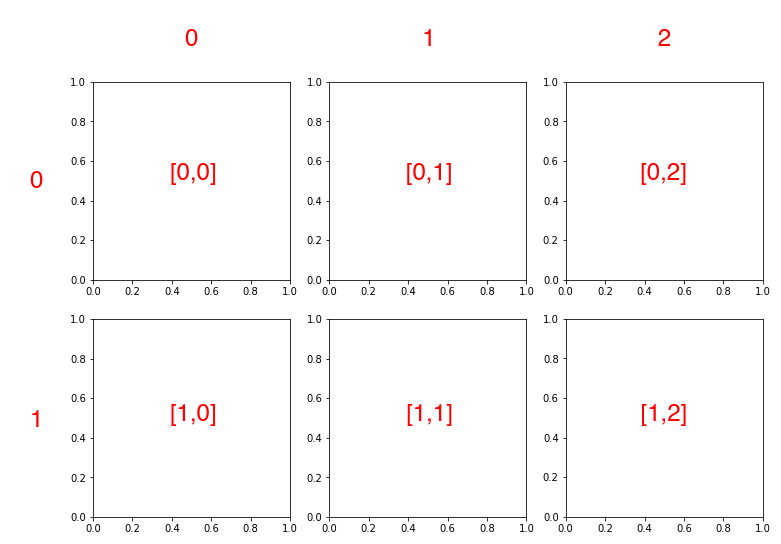


Integremos los dos últimos gráficos en una misma figura:

In [ ]:
np.random.seed(1000) # Fijar un valor semilla para reproducir ejemplo

#datos para gráfico 1
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

#Ajuste a los datos - error
z1 = np.polyfit(x, y, 3)
p1= np.poly1d(z1)
yvals = p1(x)
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

#datos para gráfico 2

np.random.seed(1000) # Fijar un valor semilla para reproducir ejemplo
mu, sigma = 0, 0.1 # Media y desvío estándar

data = np.random.normal(mu, sigma, 1000)

#Creamos la figura
fig, ax = plt.subplots(1,2, figsize=(14,6))

#Gráfico 1
ax[0].plot(x,y,'*',label='Valores Originales',alpha=0.5)
ax[0].plot(x,yvals,label='Ajuste', color='tab:brown', alpha=0.3)
ax[0].fill_between(x, yvals - y_err, yvals + y_err, alpha=0.2)
ax[0].set_xlabel('Eje x')
ax[0].set_ylabel('Eje y')
ax[0].set_title('Ajuste de función polinómica')
ax[0].legend(loc = 1)
ax[0].grid(linewidth=0.3)

#Gráfico 2
ax[1].hist(data, bins=20, color='green',)
ax[1].set_title('Histograma')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Frecuencia')
ax[1].text(-0.3, 90, r'$\mu=%d,\ \sigma=%.1f$'%(mu, sigma))
ax[1].grid(linewidth=0.3)

plt.show()


Adicionalmente, existen bibliotecas como pandas o seaborn que utilizan funcionalidades de matplotlib para generar gráficos, veamos un ejemplo:

In [ ]:
import pandas as pd
ruta = 'data/raw_data/' #Establecemos la ruta a nuestro archivo
df = pd.read_csv(ruta+'personas.csv')
df


Ahora hacemos un recorte de las columnas que nos interesan:

In [ ]:
df2 = df[['dpto', 'total']] # Esto es equivalente a df2 = df.loc[:,['dpto', 'total']] 
df2

Agrupamos por departamento y sumamos los registros:

In [ ]:
df2 = df2.groupby(['dpto']).sum()
print(df2)

Graficamos:

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df2.plot(kind='bar', ax=ax)
ax.set_ylabel('Número de habitantes')
ax.set_xlabel('Departamento')

### Ejercicio 0.10:
Generar un gráfico de barras a partir de las columnas 'varon' y 'mujer' agrupadas por departamento. Utilizar la opción _stacked=True_ al utilizar el comando plot().

Ejemplos un poco más elegantes, con pandas y seaborn, pueden encontrarse en el siguiente [enlace](https://realpython.com/python-histograms/).